<AxesSubplot:>

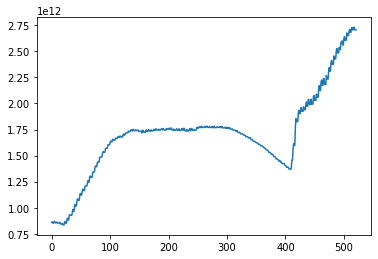

In [30]:

from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from soma_forecasts.forecast_mbs.tools import load_aggregate

from soma_forecasts.settings import (
    ROOT_DIRECTORY
)

col = "Current Face Value"

df = load_aggregate()
df[col].plot(x=df["Date"])

/Users/Matt/Desktop/soma-asset-forecasts/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/Matt/Desktop/soma-asset-forecasts/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


<AxesSubplot:title={'center':'HW Triple Exp. Smoothing'}>

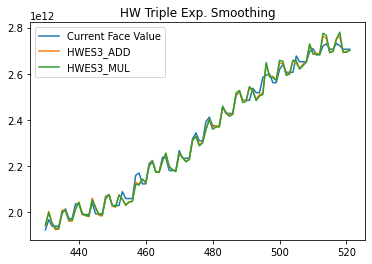

In [39]:
df = load_aggregate()
df = df[430:]
df["HWES3_ADD"] = ExponentialSmoothing(df[col], trend="add", seasonal="add", seasonal_periods=13).fit().fittedvalues
df["HWES3_MUL"] = ExponentialSmoothing(df[col], trend="mul", seasonal="mul", seasonal_periods=13).fit().fittedvalues
df[[col, "HWES3_ADD", "HWES3_MUL"]].plot(title="HW Triple Exp. Smoothing")

/Users/Matt/Desktop/soma-asset-forecasts/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/Matt/Desktop/soma-asset-forecasts/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Text(0.5, 1.0, "Soma Agency MBS Forecasts using Holt Winter's Exponential Smoothing")

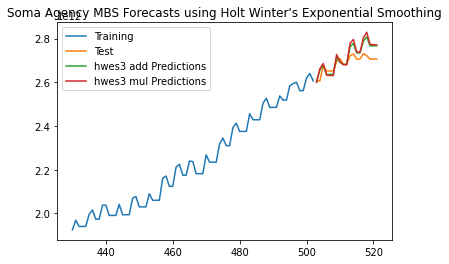

In [41]:
df = load_aggregate()
train, test = df[430:503], df[503:]
n_forecasts = len(test)

hwes3_add_model = ExponentialSmoothing(train["Current Face Value"], trend="add", seasonal="add", seasonal_periods=13).fit()
hwes3_add_forecast = hwes3_add_model.forecast(n_forecasts)

hwes3_mul_model = ExponentialSmoothing(train["Current Face Value"], trend="mul", seasonal="mul", seasonal_periods=13).fit()
hwes3_mul_forecast = hwes3_mul_model.forecast(n_forecasts)

train[col].plot(legend=True, label="Training")
test[col].plot(legend=True, label="Test")

hwes3_add_forecast.plot(legend=True, label="hwes3 add Predictions")
hwes3_mul_forecast.plot(legend=True, label="hwes3 mul Predictions")

plt.title("Soma Agency MBS Forecasts using Holt Winter's Exponential Smoothing")

    

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


hwes3_add_ms_error = mean_absolute_percentage_error(test[col], hwes3_add_forecast)
hwes3_mul_ms_error = mean_absolute_percentage_error(test[col], hwes3_mul_forecast)

print(f"{hwes3_add_ms_error} HWES3 Mean Absolute Percentage Error")
print(f"{hwes3_mul_ms_error} HWES3 Mean Absolute Percentage Error")




0.01194074393835491 HWES3 Mean Absolute Percentage Error
0.014541696432144561 HWES3 Mean Absolute Percentage Error
